mr datensat mit tf-ıdf

In [2]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "sr_sentences.txt")
labels_file = os.path.join(data_dir, "sr_labels.txt")
vocabulary_file = os.path.join(data_dir, "sr_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "sr.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7   # Adjust the threshold as per your requirements try without threshold.
cites_file = os.path.join(data_dir, "sr.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
             #if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)





C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [3]:
#Create .content and .cites files with document-document and document-word edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Path to the MR dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "mr_comments.txt")
labels_file = os.path.join(data_dir, "mr_labels.txt")
vocabulary_file = os.path.join(data_dir, "mr_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "mr.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Create the .cites file based on similarity threshold and word-document connections
"""
vectorizer = CountVectorizer(vocabulary=vocabulary)
document_term_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(document_term_matrix)
"""
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file
threshold = 0.7
cites_file = os.path.join(data_dir, "mr.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)
        
        # Add edges between document and words
        document_words = comments[i].strip().split()
        for word in document_words:
            line = f"doc_{i}\t{word}\n"
            file.write(line)
        """
        # Add edges between documents
        for k in range(i+1, num_documents):
            line = f"doc_{i}\tdoc_{k}\n"
            file.write(line)
        """


C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [3]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "sr_modified.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (2500, 2960)

Number of classes:  2


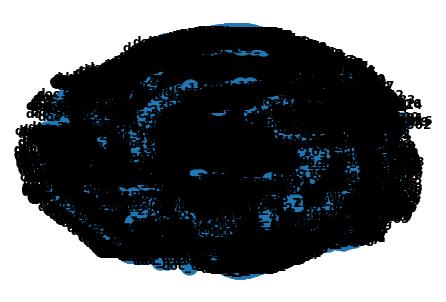

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2960)]       0           []                               
                                                                                                  
 dropout (Dropout)              (None, 2960)         0           ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 2500)]       0           []                               
                                                                                                  
 gcn_conv (GCNConv)             (None, 16)           47360       ['dropout[0][0]',                
                                                                  'input_2[0][0]']            

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.4319 - acc: 0.5020 - val_loss: 0.1468 - val_acc: 0.5000
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.4241 - acc: 0.5020 - val_loss: 0.1421 - val_acc: 0.5000
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.4193 - acc: 0.4980 - val_loss: 0.1399 - val_acc: 0.5000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.4172 - acc: 0.5020 - val_loss: 0.1395 - val_acc: 0.5000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.4167 - acc: 0.5020 - val_loss: 0.1399 - val_acc: 0.5000
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.4172 - acc: 0.5020 - val_loss: 0.1407 - val_acc: 0.5000
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 0.4179 - acc: 0.5020 - val_loss: 0.1412 - val_acc: 0.5000
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 0.4185 - acc: 0.5020 - val_loss: 0

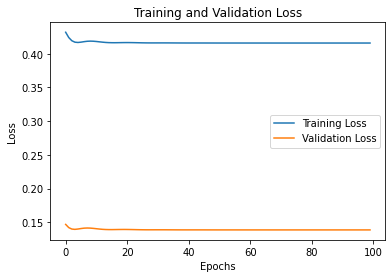

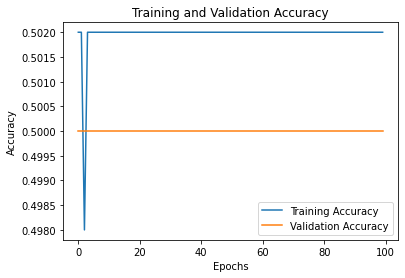

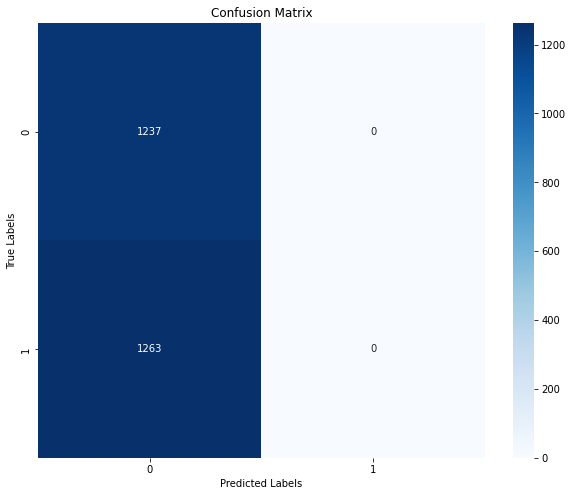

1/1 [==============================] - 1s 963ms/step
GCN Classification Report: 
               precision    recall  f1-score   support

           0       0.49      1.00      0.66      1237
           1       0.00      0.00      0.00      1263

    accuracy                           0.49      2500
   macro avg       0.25      0.50      0.33      2500
weighted avg       0.24      0.49      0.33      2500



C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [4]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'sr_modified.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'sr.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition
X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

r8 datensatz mit tf-idf

In [7]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "r8_equalized_data.txt")
labels_file = os.path.join(data_dir, "r8_equalized_labels.txt")
vocabulary_file = os.path.join(data_dir, "r8_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "r8.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7  # Adjust the threshold as per your requirements
cites_file = os.path.join(data_dir, "r8.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            #if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)


In [8]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "r8_modified.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (2007, 13294)

Number of classes:  8
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 13294)]      0           []                               
                                                                                                  
 dropout_2 (Dropout)            (None, 13294)        0           ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 2007)]       0           []                               
                                                                                                  
 gcn_conv_2 (GCNConv)           (None, 16)           212704      ['dropout_2[0][0]',              
                                             

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 1.2607 - acc: 0.1420 - val_loss: 0.4459 - val_acc: 0.1397
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 1.3076 - acc: 0.1420 - val_loss: 0.4199 - val_acc: 0.1397
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 1.2426 - acc: 0.1420 - val_loss: 0.4202 - val_acc: 0.1546
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 1.2446 - acc: 0.1595 - val_loss: 0.4235 - val_acc: 0.1546
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.2503 - acc: 0.1595 - val_loss: 0.4242 - val_acc: 0.1397
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 1.2473 - acc: 0.1595 - val_loss: 0.4230 - val_acc: 0.1397
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.2413 - acc: 0.1420 - val_loss: 0.4206 - val_acc: 0.1397
Epoch 8/100
1/1 [==============================] - 7s 7s/step - loss: 1.2346 - acc: 0.1420 - val_loss:

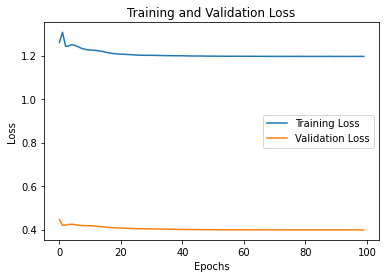

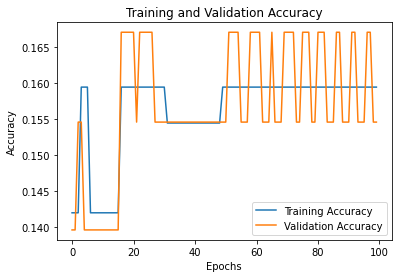

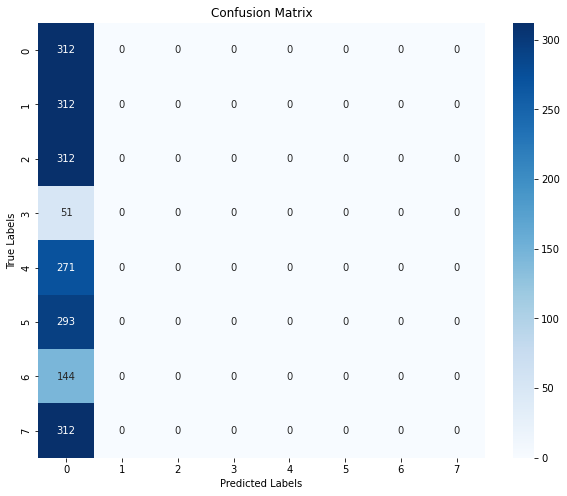

1/1 [==============================] - 1s 1s/step
GCN Classification Report: 
               precision    recall  f1-score   support

         acq       0.16      1.00      0.27       312
       crude       0.00      0.00      0.00       312
        earn       0.00      0.00      0.00       312
       grain       0.00      0.00      0.00        51
    interest       0.00      0.00      0.00       271
    money-fx       0.00      0.00      0.00       293
        ship       0.00      0.00      0.00       144
       trade       0.00      0.00      0.00       312

    accuracy                           0.16      2007
   macro avg       0.02      0.12      0.03      2007
weighted avg       0.02      0.16      0.04      2007



C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [9]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'r8_modified.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'r8.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition

X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

In [2]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "mr_comments.txt")
labels_file = os.path.join(data_dir, "mr_labels.txt")
vocabulary_file = os.path.join(data_dir, "mr_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "mr.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.0 # Adjust the threshold as per your requirements try without threshold.
cites_file = os.path.join(data_dir, "mr.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)


C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [3]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "mr_modified.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (7108, 17222)

Number of classes:  2


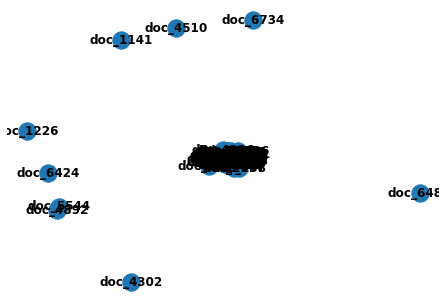

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 17222)]      0           []                               
                                                                                                  
 dropout (Dropout)              (None, 17222)        0           ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 7108)]       0           []                               
                                                                                                  
 gcn_conv (GCNConv)             (None, 16)           275552      ['dropout[0][0]',                
                                                                  'input_2[0][0]']            

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 25s 25s/step - loss: 0.5705 - acc: 0.4979 - val_loss: 0.0725 - val_acc: 0.4972
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 0.5577 - acc: 0.5028 - val_loss: 0.0708 - val_acc: 0.4972
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 0.5556 - acc: 0.5035 - val_loss: 0.0735 - val_acc: 0.6549
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 0.5574 - acc: 0.6178 - val_loss: 0.0752 - val_acc: 0.6296
Epoch 5/100
1/1 [==============================] - 8s 8s/step - loss: 0.5582 - acc: 0.6066 - val_loss: 0.0748 - val_acc: 0.5620
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 0.5569 - acc: 0.5702 - val_loss: 0.0734 - val_acc: 0.6437
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 0.5547 - acc: 0.6157 - val_loss: 0.0722 - val_acc: 0.6451
Epoch 8/100
1/1 [==============================] - 6s 6s/step - loss: 0.5528 - acc: 0.6138 - val_loss:

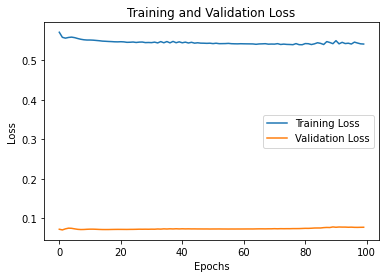

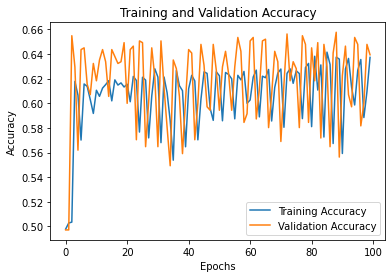

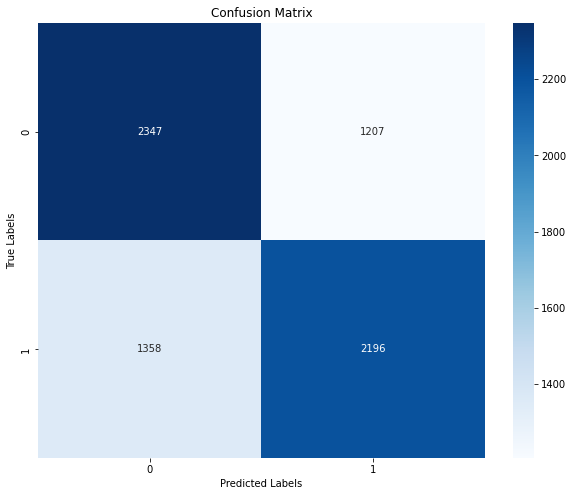

1/1 [==============================] - 2s 2s/step
GCN Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.66      0.65      3554
           1       0.65      0.62      0.63      3554

    accuracy                           0.64      7108
   macro avg       0.64      0.64      0.64      7108
weighted avg       0.64      0.64      0.64      7108



In [5]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'mr_modified.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'mr.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.8 * N)
    val_num = int(0.1 * N)
    test_num = int(0.1 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition
X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

In [11]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "sr_sentences.txt")
labels_file = os.path.join(data_dir, "sr_labels.txt")
vocabulary_file = os.path.join(data_dir, "sr_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "sr_cosinus.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7   # Adjust the threshold as per your requirements try without threshold.
cites_file = os.path.join(data_dir, "sr_cosinus.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
             if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)





In [12]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "sr_modified_cosinus.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (2500, 2960)

Number of classes:  2


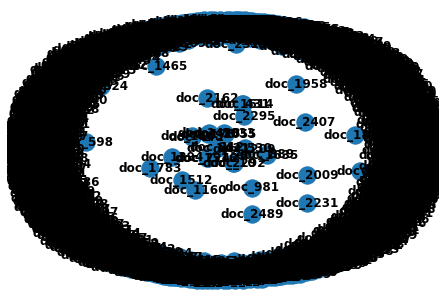

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 2960)]       0           []                               
                                                                                                  
 dropout_4 (Dropout)            (None, 2960)         0           ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 2500)]       0           []                               
                                                                                                  
 gcn_conv_4 (GCNConv)           (None, 16)           47360       ['dropout_4[0][0]',              
                                                                  'input_6[0][0]']          

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.4340 - acc: 0.5087 - val_loss: 0.1479 - val_acc: 0.5700
Epoch 2/100
1/1 [==============================] - 0s 472ms/step - loss: 0.4197 - acc: 0.5593 - val_loss: 0.1445 - val_acc: 0.6080
Epoch 3/100
1/1 [==============================] - 0s 468ms/step - loss: 0.4061 - acc: 0.6547 - val_loss: 0.1430 - val_acc: 0.6520
Epoch 4/100
1/1 [==============================] - 0s 442ms/step - loss: 0.3949 - acc: 0.7027 - val_loss: 0.1426 - val_acc: 0.6660
Epoch 5/100
1/1 [==============================] - 0s 458ms/step - loss: 0.3839 - acc: 0.7413 - val_loss: 0.1428 - val_acc: 0.6780
Epoch 6/100
1/1 [==============================] - 0s 445ms/step - loss: 0.3749 - acc: 0.7580 - val_loss: 0.1434 - val_acc: 0.6780
Epoch 7/100
1/1 [==============================] - 0s 455ms/step - loss: 0.3605 - acc: 0.7773 - val_loss: 0.1442 - val_acc: 0.6820
Epoch 8/100
1/1 [==============================] - 1s 541ms/step - loss: 0.3469 - acc:

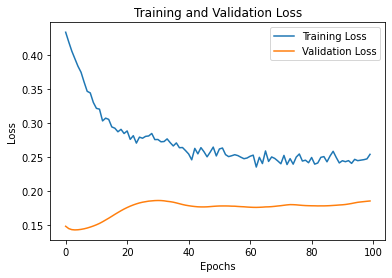

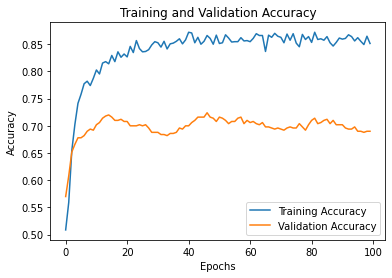

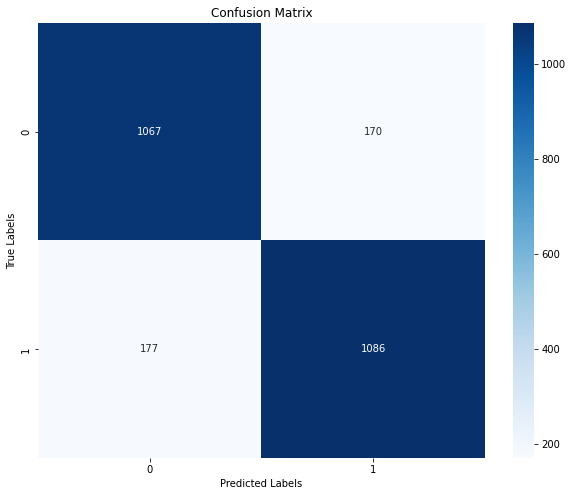

1/1 [==============================] - 0s 154ms/step
GCN Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1237
           1       0.86      0.86      0.86      1263

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



In [13]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'sr_modified_cosinus.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'sr_cosinus.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition
X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

In [14]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "r8_equalized_data.txt")
labels_file = os.path.join(data_dir, "r8_equalized_labels.txt")
vocabulary_file = os.path.join(data_dir, "r8_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "r8_cosinus.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7   # Adjust the threshold as per your requirements try without threshold.
cites_file = os.path.join(data_dir, "r8_cosinus.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
             if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)





In [15]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "r8_modified_cosinus.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (2007, 13294)

Number of classes:  8


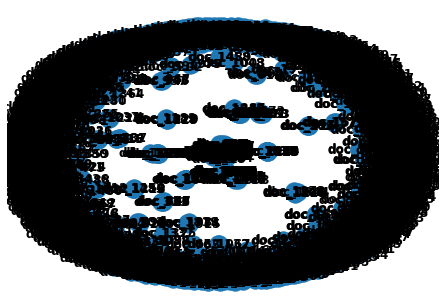

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 13294)]      0           []                               
                                                                                                  
 dropout_6 (Dropout)            (None, 13294)        0           ['input_7[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, 2007)]       0           []                               
                                                                                                  
 gcn_conv_6 (GCNConv)           (None, 16)           212704      ['dropout_6[0][0]',              
                                                                  'input_8[0][0]']          

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 1.2835 - acc: 0.0723 - val_loss: 0.3922 - val_acc: 0.5112
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.1328 - acc: 0.4095 - val_loss: 0.3507 - val_acc: 0.7357
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.9955 - acc: 0.5257 - val_loss: 0.3168 - val_acc: 0.7781
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.8760 - acc: 0.5905 - val_loss: 0.2920 - val_acc: 0.7830
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.7922 - acc: 0.6337 - val_loss: 0.2720 - val_acc: 0.8130
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.7228 - acc: 0.6827 - val_loss: 0.2557 - val_acc: 0.8354
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.6556 - acc: 0.7068 - val_loss: 0.2431 - val_acc: 0.8429
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.6141 - acc: 0.7342 - val_loss: 0

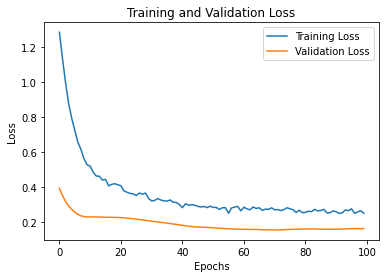

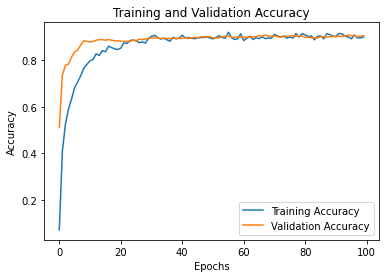

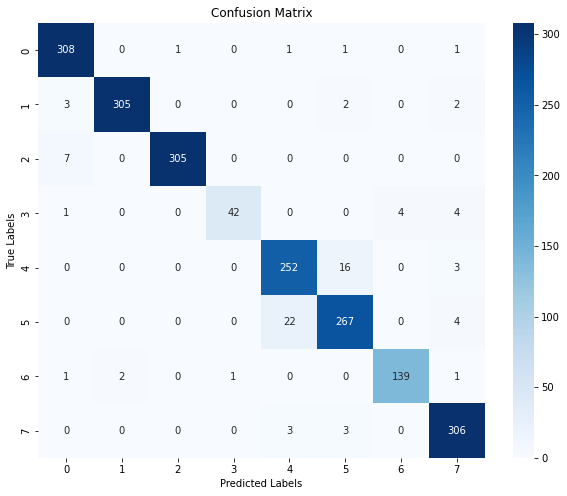

1/1 [==============================] - 0s 430ms/step
GCN Classification Report: 
               precision    recall  f1-score   support

         acq       0.96      0.99      0.97       312
       crude       0.99      0.98      0.99       312
        earn       1.00      0.98      0.99       312
       grain       0.98      0.82      0.89        51
    interest       0.91      0.93      0.92       271
    money-fx       0.92      0.91      0.92       293
        ship       0.97      0.97      0.97       144
       trade       0.95      0.98      0.97       312

    accuracy                           0.96      2007
   macro avg       0.96      0.94      0.95      2007
weighted avg       0.96      0.96      0.96      2007



In [16]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'r8_modified_cosinus.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'r8_cosinus.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition
X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

MR sr Datensatz gekürtzt voll verbunden aber mit counvector nicht tf-ıdf

In [8]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "sr_sentences.txt")
labels_file = os.path.join(data_dir, "sr_labels.txt")
vocabulary_file = os.path.join(data_dir, "sr_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "sr_countvector.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = CountVectorizer(vocabulary=vocabulary)
count_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(count_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7   # Adjust the threshold as per your requirements try without threshold.
cites_file = os.path.join(data_dir, "sr_countvector.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
             #if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)





C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [9]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "sr_modified_countvector.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (2500, 2960)

Number of classes:  2


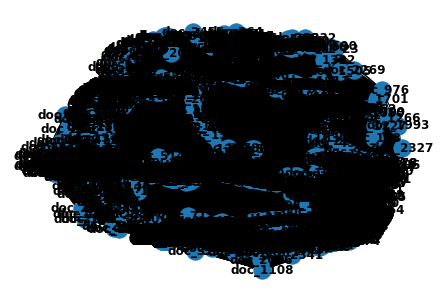

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 2960)]       0           []                               
                                                                                                  
 dropout_4 (Dropout)            (None, 2960)         0           ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 2500)]       0           []                               
                                                                                                  
 gcn_conv_4 (GCNConv)           (None, 16)           47360       ['dropout_4[0][0]',              
                                                                  'input_6[0][0]']          

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 0.4318 - acc: 0.5053 - val_loss: 0.1467 - val_acc: 0.5160
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.4241 - acc: 0.5053 - val_loss: 0.1420 - val_acc: 0.5160
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.4193 - acc: 0.5053 - val_loss: 0.1399 - val_acc: 0.5160
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.4172 - acc: 0.5053 - val_loss: 0.1394 - val_acc: 0.5160
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.4167 - acc: 0.5053 - val_loss: 0.1399 - val_acc: 0.5160
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.4172 - acc: 0.5053 - val_loss: 0.1406 - val_acc: 0.5160
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 0.4179 - acc: 0.5053 - val_loss: 0.1412 - val_acc: 0.5160
Epoch 8/100
1/1 [==============================] - 2s 2s/step - loss: 0.4184 - acc: 0.5053 - val_loss:

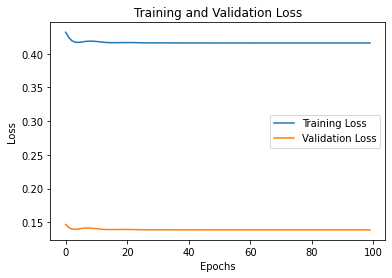

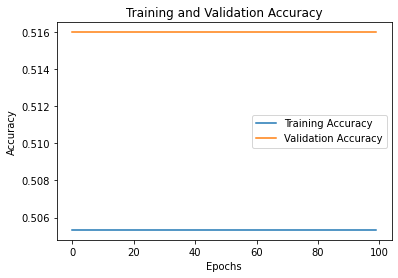

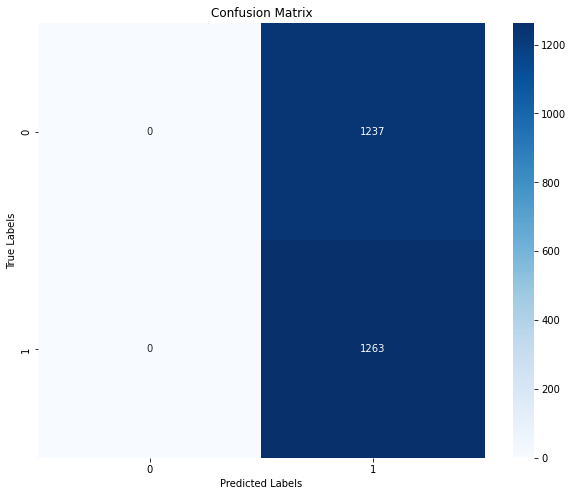

1/1 [==============================] - 1s 883ms/step
GCN Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1237
           1       0.51      1.00      0.67      1263

    accuracy                           0.51      2500
   macro avg       0.25      0.50      0.34      2500
weighted avg       0.26      0.51      0.34      2500



C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

KeyboardInterrupt: 

In [10]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
import psutil
import matplotlib.pyplot as plt
import time
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'sr_modified_countvector.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'sr_countvector.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition
X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

# Memory and CPU monitoring code
memory_usage = []
cpu_usage = []
timestamps = []
interval = 1
duration = 60
end_time = time.time() + duration

while time.time() < end_time:
    memory = psutil.virtual_memory().used
    cpu_percent = psutil.cpu_percent(interval=None)
    timestamp = time.time()

    memory_usage.append(memory)
    cpu_usage.append(cpu_percent)
    timestamps.append(timestamp)

    time.sleep(interval)

# Plotting memory and CPU usage
plt.subplot(2, 1, 1)
plt.plot(timestamps, memory_usage)
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (bytes)')
plt.title('RAM Usage over Time')

plt.subplot(2, 1, 2)
plt.plot(timestamps, cpu_usage)
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage over Time')

plt.tight_layout()
plt.show()

r8 datensatz mit countvector

In [11]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "r8_equalized_data.txt")
labels_file = os.path.join(data_dir, "r8_equalized_labels.txt")
vocabulary_file = os.path.join(data_dir, "r8_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "r8.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = CountVectorizer(vocabulary=vocabulary)
count_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(count_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7  # Adjust the threshold as per your requirements
cites_file = os.path.join(data_dir, "r8.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            #if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)


In [12]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "r8_modified.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (2007, 13294)

Number of classes:  8
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 13294)]      0           []                               
                                                                                                  
 dropout_6 (Dropout)            (None, 13294)        0           ['input_7[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, 2007)]       0           []                               
                                                                                                  
 gcn_conv_6 (GCNConv)           (None, 16)           212704      ['dropout_6[0][0]',              
                                             

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 1.2622 - acc: 0.1420 - val_loss: 0.4306 - val_acc: 0.1646
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 1.2857 - acc: 0.1420 - val_loss: 0.4241 - val_acc: 0.1646
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 1.2500 - acc: 0.1420 - val_loss: 0.4144 - val_acc: 0.1646
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 1.2229 - acc: 0.1420 - val_loss: 0.4149 - val_acc: 0.1646
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.2218 - acc: 0.1420 - val_loss: 0.4160 - val_acc: 0.1646
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 1.2172 - acc: 0.1420 - val_loss: 0.4175 - val_acc: 0.1222
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.2143 - acc: 0.1694 - val_loss: 0.4178 - val_acc: 0.1222
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 1.2127 - acc: 0.1694 - val_loss: 0

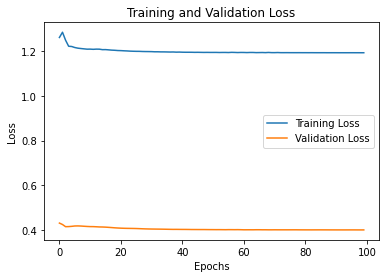

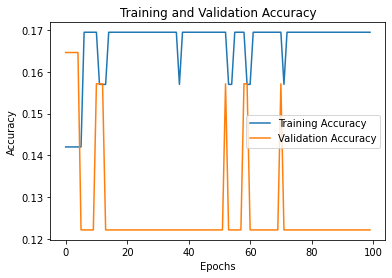

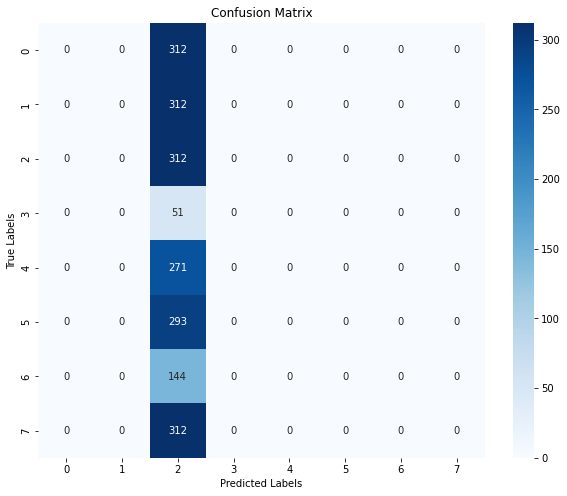

1/1 [==============================] - 1s 964ms/step
GCN Classification Report: 
               precision    recall  f1-score   support

         acq       0.00      0.00      0.00       312
       crude       0.00      0.00      0.00       312
        earn       0.16      1.00      0.27       312
       grain       0.00      0.00      0.00        51
    interest       0.00      0.00      0.00       271
    money-fx       0.00      0.00      0.00       293
        ship       0.00      0.00      0.00       144
       trade       0.00      0.00      0.00       312

    accuracy                           0.16      2007
   macro avg       0.02      0.12      0.03      2007
weighted avg       0.02      0.16      0.04      2007



C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [13]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'r8_modified.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'r8.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition

X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

mr dataset cosinüs countvector

In [14]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "mr_sentences_clean.txt")
labels_file = os.path.join(data_dir, "mr_labels_clean.txt")
vocabulary_file = os.path.join(data_dir, "mr_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "mr.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = CountVectorizer(vocabulary=vocabulary)
count_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(count_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7  # Adjust the threshold as per your requirements
cites_file = os.path.join(data_dir, "mr.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)


C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [15]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "mr_modified.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (7108, 3083)

Number of classes:  2
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 3083)]       0           []                               
                                                                                                  
 dropout_8 (Dropout)            (None, 3083)         0           ['input_9[0][0]']                
                                                                                                  
 input_10 (InputLayer)          [(None, 7108)]       0           []                               
                                                                                                  
 gcn_conv_8 (GCNConv)           (None, 16)           49328       ['dropout_8[0][0]',              
                                              

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 0.4339 - acc: 0.5110 - val_loss: 0.1487 - val_acc: 0.5961
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.4179 - acc: 0.5912 - val_loss: 0.1449 - val_acc: 0.6608
Epoch 3/100
1/1 [==============================] - 1s 987ms/step - loss: 0.4048 - acc: 0.6571 - val_loss: 0.1426 - val_acc: 0.6918
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.3935 - acc: 0.6968 - val_loss: 0.1412 - val_acc: 0.7058
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.3854 - acc: 0.7132 - val_loss: 0.1404 - val_acc: 0.7065
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.3761 - acc: 0.7303 - val_loss: 0.1403 - val_acc: 0.7072
Epoch 7/100
1/1 [==============================] - 1s 998ms/step - loss: 0.3666 - acc: 0.7366 - val_loss: 0.1407 - val_acc: 0.7101
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 0.3584 - acc: 0.7409 - val

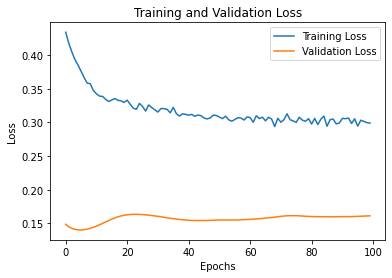

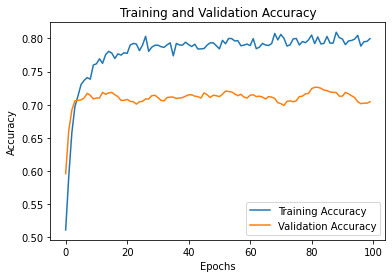

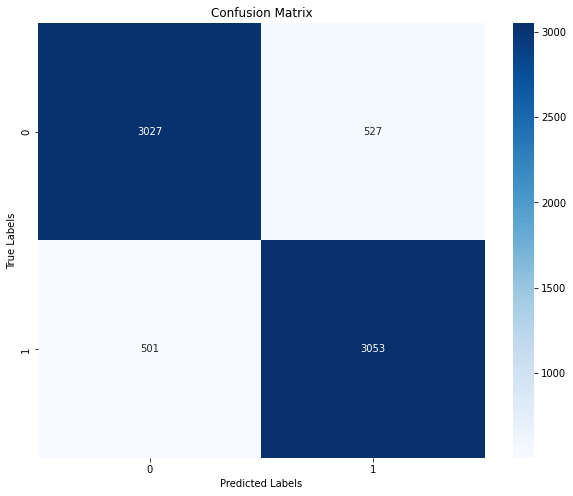

1/1 [==============================] - 0s 329ms/step
GCN Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      3554
           1       0.85      0.86      0.86      3554

    accuracy                           0.86      7108
   macro avg       0.86      0.86      0.86      7108
weighted avg       0.86      0.86      0.86      7108



In [16]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'mr_modified.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'mr.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition

X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

r8 cosinus count vector

In [17]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "r8_sentences.txt")
labels_file = os.path.join(data_dir, "r8_labels.txt")
vocabulary_file = os.path.join(data_dir, "r8_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "r8.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = CountVectorizer(vocabulary=vocabulary)
count_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(count_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7  # Adjust the threshold as per your requirements
cites_file = os.path.join(data_dir, "r8.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)


In [18]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "r8_modified.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (7674, 13294)

Number of classes:  8
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 13294)]      0           []                               
                                                                                                  
 dropout_10 (Dropout)           (None, 13294)        0           ['input_11[0][0]']               
                                                                                                  
 input_12 (InputLayer)          [(None, 7674)]       0           []                               
                                                                                                  
 gcn_conv_10 (GCNConv)          (None, 16)           212704      ['dropout_10[0][0]',             
                                             

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 1.2666 - acc: 0.0717 - val_loss: 0.3672 - val_acc: 0.7718
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 1.0911 - acc: 0.6538 - val_loss: 0.3224 - val_acc: 0.7979
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 0.9555 - acc: 0.6955 - val_loss: 0.2851 - val_acc: 0.8390
Epoch 4/100
1/1 [==============================] - 6s 6s/step - loss: 0.8284 - acc: 0.7472 - val_loss: 0.2523 - val_acc: 0.8794
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 0.7278 - acc: 0.7884 - val_loss: 0.2259 - val_acc: 0.8977
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 0.6402 - acc: 0.8104 - val_loss: 0.2069 - val_acc: 0.9074
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 0.5728 - acc: 0.8223 - val_loss: 0.1930 - val_acc: 0.9166
Epoch 8/100
1/1 [==============================] - 5s 5s/step - loss: 0.5270 - acc: 0.8286 - val_loss:

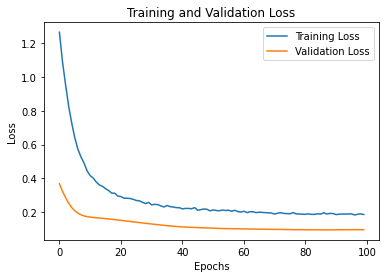

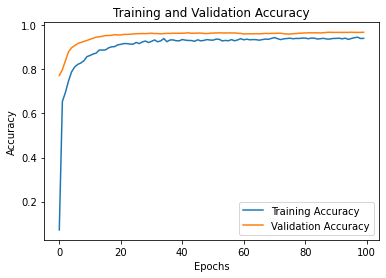

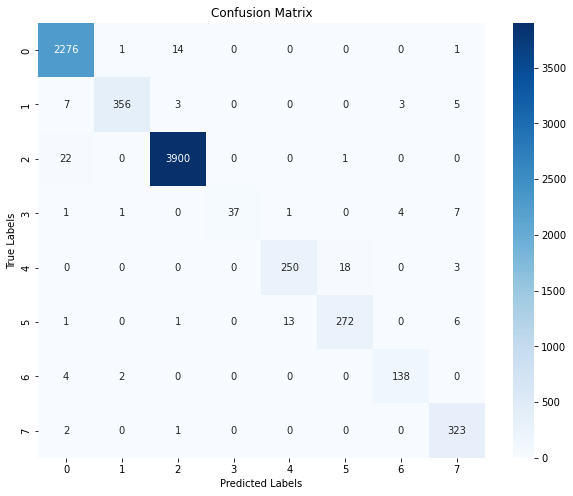

1/1 [==============================] - 2s 2s/step
GCN Classification Report: 
               precision    recall  f1-score   support

         acq       0.98      0.99      0.99      2292
       crude       0.99      0.95      0.97       374
        earn       1.00      0.99      0.99      3923
       grain       1.00      0.73      0.84        51
    interest       0.95      0.92      0.93       271
    money-fx       0.93      0.93      0.93       293
        ship       0.95      0.96      0.96       144
       trade       0.94      0.99      0.96       326

    accuracy                           0.98      7674
   macro avg       0.97      0.93      0.95      7674
weighted avg       0.98      0.98      0.98      7674



In [19]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'r8_modified.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'r8.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition

X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

mr datensat cosinus mit tfıdf

In [20]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "mr_sentences_clean.txt")
labels_file = os.path.join(data_dir, "mr_labels_clean.txt")
vocabulary_file = os.path.join(data_dir, "r8_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "mr_cos_tf.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7  # Adjust the threshold as per your requirements
cites_file = os.path.join(data_dir, "mr_cos_tf.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)


In [21]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "mr_modified_cos_tf.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (7108, 13294)

Number of classes:  2
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 13294)]      0           []                               
                                                                                                  
 dropout_12 (Dropout)           (None, 13294)        0           ['input_13[0][0]']               
                                                                                                  
 input_14 (InputLayer)          [(None, 7108)]       0           []                               
                                                                                                  
 gcn_conv_12 (GCNConv)          (None, 16)           212704      ['dropout_12[0][0]',             
                                             

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 17s 17s/step - loss: 0.4320 - acc: 0.5033 - val_loss: 0.1425 - val_acc: 0.6003
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 0.4155 - acc: 0.6140 - val_loss: 0.1400 - val_acc: 0.6291
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 0.4086 - acc: 0.6424 - val_loss: 0.1417 - val_acc: 0.6319
Epoch 4/100
1/1 [==============================] - 5s 5s/step - loss: 0.4065 - acc: 0.6581 - val_loss: 0.1435 - val_acc: 0.6348
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 0.4017 - acc: 0.6796 - val_loss: 0.1438 - val_acc: 0.6467
Epoch 6/100
1/1 [==============================] - 5s 5s/step - loss: 0.3968 - acc: 0.6806 - val_loss: 0.1432 - val_acc: 0.6531
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 0.3924 - acc: 0.6874 - val_loss: 0.1426 - val_acc: 0.6531
Epoch 8/100
1/1 [==============================] - 5s 5s/step - loss: 0.3858 - acc: 0.6832 - val_loss:

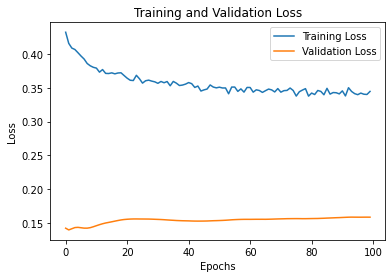

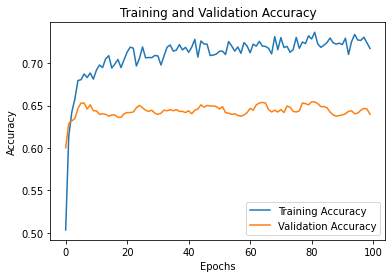

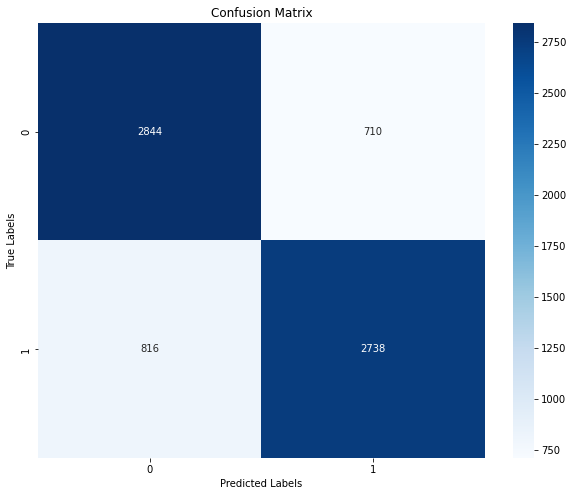

1/1 [==============================] - 2s 2s/step
GCN Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      3554
           1       0.79      0.77      0.78      3554

    accuracy                           0.79      7108
   macro avg       0.79      0.79      0.79      7108
weighted avg       0.79      0.79      0.79      7108



In [22]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'mr_modified_cos_tf.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'mr_cos_tf.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition

X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))

r8 datensatz cosinus tfidf

In [23]:
#create .content and .cites just based on document-documend edges
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Path to the r8 dataset files
data_dir = r"C:\Users\Emre Davutcan\Desktop\preprocess"
comments_file = os.path.join(data_dir, "r8_sentences.txt")
labels_file = os.path.join(data_dir, "r8_labels.txt")
vocabulary_file = os.path.join(data_dir, "r8_vocabulary.txt")

# Read comments and labels
with open(comments_file, "r") as file:
    comments = file.readlines()

with open(labels_file, "r") as file:
    labels = file.readlines()

# Read vocabulary
with open(vocabulary_file, "r") as file:
    vocabulary = file.read().splitlines()

# Create the .content file
content_file = os.path.join(data_dir, "r8_cos_tf.content")
with open(content_file, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(vocabulary.index(word) + 1) for word in words if word in vocabulary]  # Exclude out-of-vocabulary words
        line = f"{document_id}\t{' '.join(word_ids)}\t{label}\n"
        file.write(line)

# Calculate document similarities
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_matrix = vectorizer.fit_transform(comments)
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create the .cites file based on similarity threshold
threshold = 0.7  # Adjust the threshold as per your requirements
cites_file = os.path.join(data_dir, "r8_cos_tf.cites")
with open(cites_file, "w") as file:
    num_documents = len(comments)
    for i in range(num_documents):
        for j in range(i+1, num_documents):
            if similarity_matrix[i, j] > threshold:
                line = f"doc_{i}\tdoc_{j}\n"
                file.write(line)

In [24]:
# Create the modified .content file
content_file_modified = os.path.join(data_dir, "r8_modified_cos_tf.content")
with open(content_file_modified, "w") as file:
    for i, comment in enumerate(comments):
        document_id = f"doc_{i}"
        label = labels[i].strip()
        words = comment.strip().split()
        word_ids = [str(int(word in words)) for word in vocabulary]  # Convert to 1 or 0 if the word occurs in the document
        line = document_id + '\t' + '\t'.join(word_ids) + '\t' + label + '\n'
        file.write(line)

X shape:  (7674, 13294)

Number of classes:  8
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 13294)]      0           []                               
                                                                                                  
 dropout_14 (Dropout)           (None, 13294)        0           ['input_15[0][0]']               
                                                                                                  
 input_16 (InputLayer)          [(None, 7674)]       0           []                               
                                                                                                  
 gcn_conv_14 (GCNConv)          (None, 16)           212704      ['dropout_14[0][0]',             
                                             

C:\Users\Emre Davutcan\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 1.2765 - acc: 0.0877 - val_loss: 0.3666 - val_acc: 0.8377
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 1.0752 - acc: 0.7155 - val_loss: 0.3045 - val_acc: 0.8501
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 0.9044 - acc: 0.7643 - val_loss: 0.2594 - val_acc: 0.8625
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 0.7670 - acc: 0.7902 - val_loss: 0.2268 - val_acc: 0.8748
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 0.6741 - acc: 0.8067 - val_loss: 0.2041 - val_acc: 0.8885
Epoch 6/100
1/1 [==============================] - 6s 6s/step - loss: 0.5806 - acc: 0.8265 - val_loss: 0.1890 - val_acc: 0.8931
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 0.5184 - acc: 0.8497 - val_loss: 0.1798 - val_acc: 0.9003
Epoch 8/100
1/1 [==============================] - 6s 6s/step - loss: 0.4743 - acc: 0.8584 - val_loss:

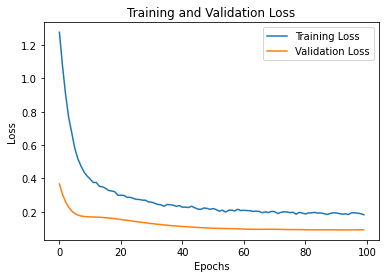

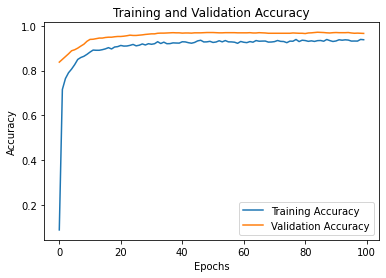

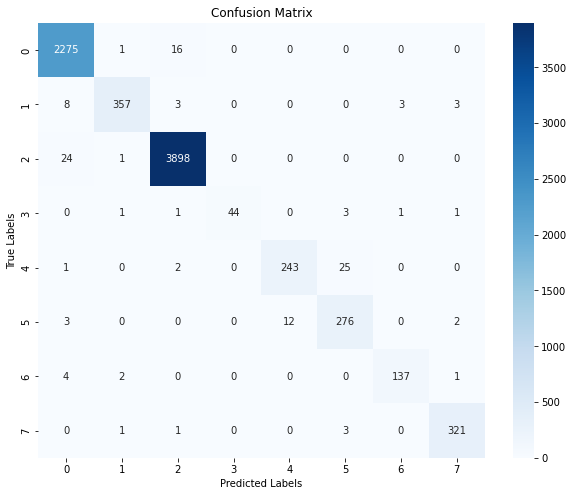

1/1 [==============================] - 2s 2s/step
GCN Classification Report: 
               precision    recall  f1-score   support

         acq       0.98      0.99      0.99      2292
       crude       0.98      0.95      0.97       374
        earn       0.99      0.99      0.99      3923
       grain       1.00      0.86      0.93        51
    interest       0.95      0.90      0.92       271
    money-fx       0.90      0.94      0.92       293
        ship       0.97      0.95      0.96       144
       trade       0.98      0.98      0.98       326

    accuracy                           0.98      7674
   macro avg       0.97      0.95      0.96      7674
weighted avg       0.98      0.98      0.98      7674



In [25]:
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn import preprocessing
from keras.utils import to_categorical
from spektral.layers import GCNConv
from keras.layers import Input,Dropout
from tensorflow.keras import regularizers
from keras import Model
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve
#Lade den Datensatz
all_data = []
all_edges = []

for root,dirs,files in os.walk(r"C:\Users\Emre Davutcan\Desktop\preprocess"):
    #print(root)
    for file in files:
        #print(file)
        if 'r8_modified_cos_tf.content' in file:
            with open(os.path.join(root,file),'r') as f:                
                all_data.extend(f.read().splitlines())
        elif 'r8_cos_tf.cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Mische den datensatz weil er im orginal nach den Labels geordnet ist 
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

#Gehe durch all_data und seperiere die Spalten
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#Seperiere die Kanten
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))


num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

def limit_data(labels):
    N = len(labels)
    train_num = int(0.6 * N)
    val_num = int(0.2 * N)
    test_num = int(0.2 * N)

    indices = np.arange(N)
    np.random.shuffle(indices)

    train_idx = indices[:train_num]
    val_idx = indices[train_num:(train_num + val_num)]
    test_idx = indices[(train_num + val_num):(train_num + val_num + test_num)]

    return train_idx, val_idx, test_idx

train_idx, val_idx, test_idx = limit_data(labels)

# Setze die train,val,test masken auf true/false
train_mask = np.zeros((N,), dtype=bool)
train_mask[train_idx] = True

val_mask = np.zeros((N,), dtype=bool)
val_mask[val_idx] = True

test_mask = np.zeros((N,), dtype=bool)
test_mask[test_idx] = True


#Bilde den Graph füge Knoten und Kanten hinzu
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#Generiere die adjazenz matrix (A)
A = nx.adjacency_matrix(G)
"""
#Anfang citeseer

# Filter out the edges referencing missing nodes
filtered_edges = []
for edge in edge_list:
    u, v = edge
    if u in nodes and v in nodes:
        filtered_edges.append(edge)


# Bilde den Graphen
G = nx.Graph()

# Füge die Knoten hinzu
G.add_nodes_from(nodes)

# Add filtered edges to the graph
G.add_edges_from(filtered_edges)

# Obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)

#ende citeseer
"""
#Encode labels zum one hote format je nach dokument
def encode_label(labels):
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

# Plotte den graph
#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()

#Füge Parameter hinzu
channels = 16           # Number of channels in the first layer
dropout = 0.5           # Dropout rate for the features
l2_reg = 5e-4           # L2 regularization rate
learning_rate = 1e-2    # Learning rate
epochs = 100            # Number of training epochs
es_patience = 10        # Patience for early stopping

# Preprocessing operation
A = GCNConv.preprocess(A).astype('f4')

# Model definition

X_in = Input(shape=(F, ))
fltr_in = Input((N, ), sparse=True)

dropout_1 = Dropout(dropout)(X_in)
graph_conv_1 = GCNConv(channels,
                         activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg),
                         use_bias=False)([dropout_1, fltr_in])

dropout_2 = Dropout(dropout)(graph_conv_1)
graph_conv_2 = GCNConv(num_classes,
                    activation="softmax",
                         use_bias=False)([dropout_2, fltr_in])

# Bilde das model
model = Model(inputs=[X_in, fltr_in], outputs=graph_conv_2)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              weighted_metrics=['acc'])
model.summary()

tbCallBack_GCN = tf.keras.callbacks.TensorBoard(
    log_dir='./Tensorboard_GCN_cora',
)
callback_GCN = [tbCallBack_GCN]

# Trainiere das model
validation_data = ([X, A], labels_encoded, val_mask)
history= model.fit([X, A],
          labels_encoded,
          sample_weight=train_mask,
          epochs=epochs,
          batch_size=N,
          validation_data=validation_data,
          shuffle=False,
          )
#callbacks=[EarlyStopping(patience=es_patience,  restore_best_weights=True),tbCallBack_GCN]

# Predict labels for all samples
y_pred = model.predict([X, A], batch_size=N)
y_true = np.argmax(labels_encoded, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred_prob = model.predict([X, A], batch_size=N)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



y = labels_encoded
y_pred = model.predict([X, A],batch_size=N)
report = classification_report(np.argmax(y,axis=1), np.argmax(y_pred,axis=1), target_names=classes)
print('GCN Classification Report: \n {}'.format(report))